importing the necessary libraries for working with iris dataset.
we use classification model for iris because the target labels are of classifier type of three classes i.e. Iris-setosa,Iris-virginica,Iris-versicolor

In [30]:
#importing libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import io

Reading the dataset

In [31]:
#getting the dataset
df = pd.read_csv('C:/Users/muppi/Downloads/archive/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


df.describe()--->This will give you a statistical summary of the DataFrame df, including count, mean, standard deviation, minimum, maximum, and various percentiles for numerical columns. If df contains non-numeric columns, it will provide statistics for numeric columns only.



In [32]:
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


 the unique() method is used to get unique values in a Series

In [33]:
df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [34]:
df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [35]:
df['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [36]:
df['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

here in this model for classifying i have taken Species as a target label

In [37]:
print("Target Labels", df["Species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


The isnull().values.any() expression checks if there are any missing values (NaNs) in the DataFrame df. It returns True if there are any missing values and False otherwise.

In [38]:
df.isnull().values.any()

False

The expression df.isnull().sum() returns the number of missing values (NaNs) in each column of the DataFrame df. It calculates the sum of null values for each column.



In [39]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

map provided is mapping the string labels in the 'Species' column to numerical values and then converting the column to integers.
This operation replaces the original string labels with numerical values in the 'Species' column.

In [40]:
df['Species'] = df['Species'].map({'Iris-setosa' :0, 'Iris-versicolor' :1, 'Iris-virginica' :2}).astype(int) #mapping numbers
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


Scatter plot will generate a scatter plot with 'Sepal Length (cm)' on the x-axis and 'Sepal Width (cm)' on the y-axis. Adjust it according to your specific needs.

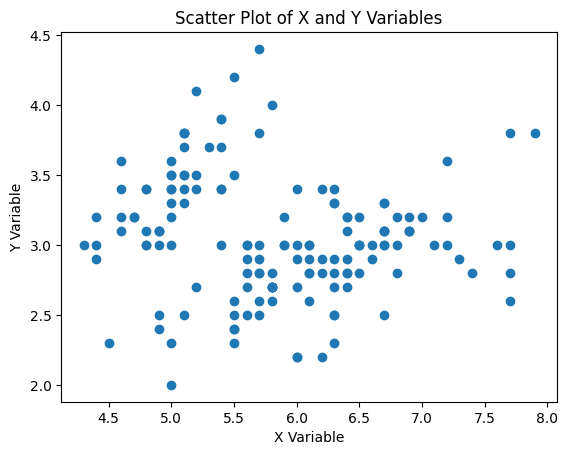

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
x=df['SepalLengthCm']
y=df['SepalWidthCm']

# Plotting the scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('X Variable')
plt.ylabel('Y Variable')
plt.title('Scatter Plot of X and Y Variables')

# Display the plot
plt.show()


Seaborn's pairplot() function to create a grid of pairwise scatterplots, and potentially other visualizations, to explore the relationships between multiple variables in your DataFrame df
The pairplot is a powerful tool for visualizing relationships in high-dimensional datasets. It allows you to quickly identify patterns, correlations, and potential outliers between different variables.

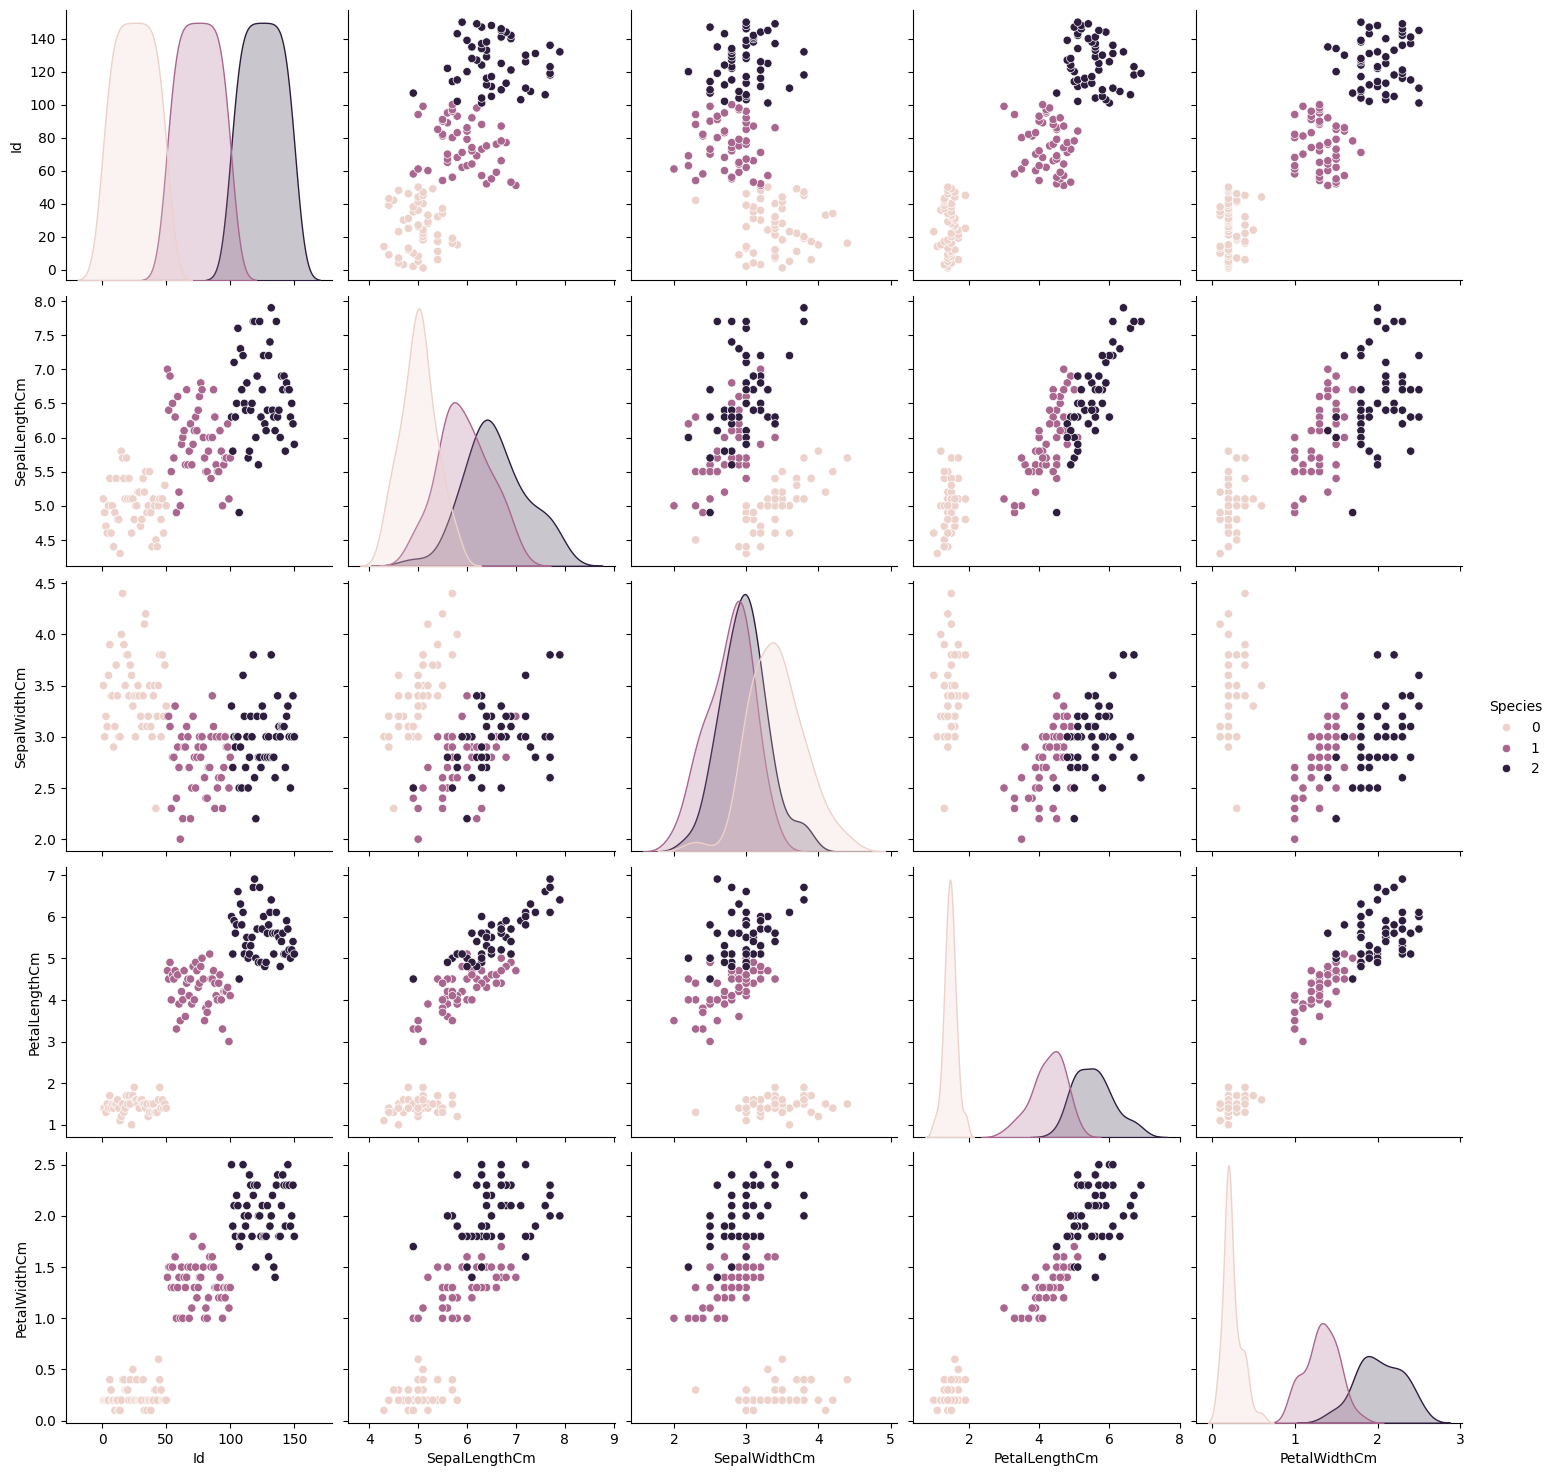

In [42]:
sns.pairplot(df, hue="Species", height=3);
plt.show()

Here i have dropping the Species and Id columns from input labels and in target label i have taken a Species column for classifying which type based on four input features like 'SepalLengthCm', 'SepalWidthCm	', 'PetalLengthCm',	'PetalWidthCm'and predicting the target label Species

In [43]:
x_data = df.drop(['Species','Id'],axis=1)
y_data = df['Species']
data = pd.DataFrame(['SepalLengthCm', 'SepalWidthCm	', 'PetalLengthCm',	'PetalWidthCm'])
print("inputs:",x_data)
print("target label:",y_data)


inputs:      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
target label: 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


 splitting data into training and testing sets using the train_test_split function from scikit-learn. This function randomly splits the data into two subsets: one for training the model (X_train and y_train) and the other for evaluating its performance (X_test and y_test).

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 42)

Here in this model i have used Knn classifierbecause KNN is a simple and effective algorithm for classification tasks, and the iris dataset is well-suited for this type of algorithm. The dataset is small, with clear separations between the classes, making it a good starting point for learning and practicing classification algorithms.

In [45]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)

 calculates various performance metrics for evaluating the classifier's performance on the testing data

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)
#print(accuracy_score(X_train))
#print(accuracy_scor(X_test))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [47]:
# Sample new input for prediction
new_input = np.array([[ 3.5, 1.4, 0.2,3.5], [ 2.9, 4.3, 1.3,5.9], [ 2.8, 6.4, 2.1,8.0]])

# Predict the output labels for the new input
predictions = knn.predict(new_input)

# Output predictions
print("Predictions:", predictions)



Predictions: [0 1 2]


Atlast i have tested my model with new features and it fits and predict the target values as 0 for Iris-setosa ,1 for Versi-color and predicts 2 for Iris-virginica
